In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

Question 1(c)

In [2]:
Q1_tau=1
Q1_w=0.2
Q1_v=1
Q1_kk=25
Q1_x=0.2
Q1_t0=0
Q1_u0=0
Q1_ddt=0.001

Q1_Nspike=10000
Q1_NSimulation=1000
Q1_u_final=np.zeros(Q1_NSimulation)

Q1_RI0=Q1_tau*Q1_v*Q1_kk*Q1_w
Q1_sigma=(Q1_tau*Q1_v*Q1_kk*Q1_w**2)**0.5


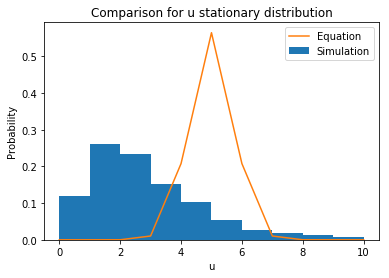

In [3]:
for Q1_ii in range(Q1_NSimulation):

    

    Q1_t_spike=np.random.poisson(1/Q1_kk,Q1_Nspike)
    Q1_N=math.ceil(np.sum(Q1_t_spike)/Q1_ddt)
    Q1_t=np.zeros(Q1_N)
    Q1_u=np.zeros(Q1_N)
    Q1_i=0
    Q1_j=0
    Q1_k=0
    Q1_dudt=0

    Q1_t_dur=0

    for Q1_i in range(1,Q1_N):
        Q1_t[Q1_i]=Q1_t[Q1_i-1]+Q1_ddt
        Q1_u[Q1_i]=Q1_u[Q1_i-1]+Q1_dudt*Q1_ddt
        Q1_t_dur=Q1_t_dur+Q1_ddt
        if Q1_t_dur>=Q1_t_spike[Q1_j]:
                Q1_nspike=0
                Q1_t_dur_spike=Q1_t_spike[Q1_j]
                while Q1_t_dur>=Q1_t_dur_spike:
                    Q1_j+=1
                    Q1_nspike+=1
                    Q1_t_dur_spike=Q1_t_dur_spike+Q1_t_spike[Q1_j]
                Q1_u[Q1_i]=Q1_u[Q1_i]+Q1_nspike*Q1_w
                Q1_t_dur=Q1_t_dur-Q1_t_dur_spike+Q1_t_spike[Q1_j]

        Q1_dudt=-Q1_u[Q1_i]/Q1_tau

    Q1_u_final[Q1_ii]=Q1_u[Q1_N-1]

Q1_u_final_hist_counts,Q1_u_final_hist_bins=np.histogram(Q1_u_final,bins=10,range=(0,10))

Q1_u_Eq=range(11)
Q1_p_Eq=np.zeros(len(Q1_u_Eq))
for Q1_ii in range(len(Q1_u_Eq)):
    Q1_p_Eq[Q1_ii]=(1/np.pi**0.5)*(1/Q1_sigma)*np.exp(-(Q1_u_Eq[Q1_ii]-Q1_RI0)**2/Q1_sigma**2)

plt.hist(Q1_u_final_hist_bins[:-1], Q1_u_final_hist_bins, weights=Q1_u_final_hist_counts/Q1_NSimulation)
plt.plot(Q1_u_Eq,Q1_p_Eq)
plt.xlabel("u")
plt.ylabel("Probability")
plt.title("Comparison for u stationary distribution")
plt.legend(["Equation","Simulation"])

Question 2

In [4]:
tau=1
w=0.2
v=1
theta=5
kk=25
a=0
x=0.2

t0=0
u0=0

ddt=0.001
firstpasstime=np.zeros(1000)


In [5]:

for ii in range(1000):

    tf=[]

    t_spike=np.random.exponential(1/kk,1000)
    N=math.ceil(np.sum(t_spike)/ddt)
    t=np.zeros(N)
    u=np.zeros(N)
    i=0
    j=0
    k=0
    dudt=0

    t_dur=0

    for i in range(1,N):
        t[i]=t[i-1]+ddt
        u[i]=u[i-1]+dudt*ddt
        t_dur=t_dur+ddt
        if u[i-1]>=theta:
            u[i]=u0
            dudt=0
            tf.append(t[i-1])

        else:
            if t_dur>=t_spike[j]:
                nspike=0
                t_dur_spike=t_spike[j]
                while t_dur>=t_dur_spike:
                    j+=1
                    nspike+=1
                    t_dur_spike=t_dur_spike+t_spike[j]
                u[i]=u[i]+nspike*w
                t_dur=t_dur-t_dur_spike+t_spike[j]

            dudt=-u[i]/tau

    firstpasstime[ii]=tf[0]

time=np.mean(firstpasstime)

print(f'The expect time from simulation is {time}. The time from formula is 2.16.')

The expect time from simulation is 2.700369999999879. The time from formula is 2.16.


Question 5

In [6]:
Q5_N=1000
Q5_miu=[0.1/Q5_N, 1/Q5_N, 10/Q5_N]
Q5_T=np.zeros([3,1000])


for jj in range(1000):
    for ii in range(len(Q5_miu)):
        Q5_N_genotype1=1000
        Q5_N_genotype2=0
        Q5_N_genotype3=0
        Q5_t=0
        while Q5_N_genotype3 == 0:
            Q5_t=Q5_t+1
            Q5_p_geno1to2=Q5_N_genotype1*Q5_miu[ii]
            Q5_temp=np.random.uniform()
            if Q5_temp<=Q5_p_geno1to2:
                Q5_N_genotype2=Q5_N_genotype2+1
                Q5_N_genotype1=Q5_N_genotype1-1
            Q5_p_geno2to3=Q5_N_genotype2*Q5_miu[ii]
            Q5_temp=np.random.uniform()
            if Q5_temp<=Q5_p_geno2to3:
                Q5_N_genotype3=Q5_N_genotype3+1
                Q5_N_genotype2=Q5_N_genotype2-1   
                Q5_T[ii,jj]=Q5_t
    


In [7]:
np.mean(Q5_T[0,:])

404.051

In [8]:
np.mean(Q5_T[1,:])

39.135

In [9]:
np.mean(Q5_T[2,:])

11.954